<a href="https://colab.research.google.com/github/jokoeliyanto/Gunting-Batu-Kertas-Classification/blob/main/FINAL_SUBMISSION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](https://drive.google.com/uc?id=1JBCyAKlW0SY9b5KLnIF8RLO2yqaxQKi-
)

# Pendahuluan
Assalamualaikum warahmatullahi wabarakatuh, 

Berikut adalah pemodelan JST yang saya susun untuk lulus dari kelas "Belajar Machine Learning untuk Pemula" dari Dicoding Academy. 

# Mengakses Dataset

Mengunduh dataset dari link yang diberikan DICODING Academy

In [ ]:
!wget --no-check-certificate https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip

--2021-04-03 12:51:14--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘rockpaperscissors.zip’

rockpaperscissors.z 100%[===================>] 307.92M  7.66MB/s    in 61s     

2021-04-03 12:52:16 (5.04 MB/s) - ‘rockpaperscissors.zip’ saved [322873683/322873683]



Mengekstrak file zip

In [ ]:
import os                                                                         #Mengimpor modul os mengakses folder data
import zipfile                                                                    #Mengimpor modul zipfile untuk membaca file zip

local_zip = '/content/rockpaperscissors.zip'                                      #Mendefinisikan file zip yang akan diekstrak 
zip_ref = zipfile.ZipFile(local_zip, 'r')                                         #Mengekstrak file zip
zip_ref.extractall('/content/')                                                   #Menempatkan file hasil ekstrak zip
zip_ref.close()                                                                   #Menghentikan fungsi zip.ref

Menyiapkan folder untuk data gambar Gunting, Batu, Kertas

In [ ]:
import os                                                                         #Mengimpor modul os mengakses folder data
fold_gunting = os.path.join('/content/rockpaperscissors/scissors')                #Mendefinisikan Folder Training untuk gambar Gunting
fold_batu= os.path.join('/content/rockpaperscissors/rock')                        #Mendefinisikan Folder Training untuk gambar Batu
fold_kertas = os.path.join('/content/rockpaperscissors/paper')                    #Mendefinisikan Folder Training untuk gambar Kertas

print('Jumlah total gambar gunting:', len(os.listdir(fold_gunting)))              #Menampilkan jumlah gambar di dalam folder Gunting
print('Jumlah total gambar batu:', len(os.listdir(fold_batu)))                    #Menampilkan jumlah gambar di dalam folder Batu
print('Jumlah total gambar kertas:', len(os.listdir(fold_kertas)))                #Menampilkan jumlah gambar di dalam folder Kertas

print("Menampilkan nama file gambar:")                                     
file_gunting = os.listdir(fold_gunting)                                           #Mendaftar file di dalam folder gunting
print("Gunting:",file_gunting[:5])                                                #Menampilkan nama 5 file pertama di dalam folder gunting

file_batu = os.listdir(fold_batu)                                                 #Mendaftar file di dalam folder batu
print("Batu:",file_batu[:5])                                                      #Menampilkan nama 5 file pertama di dalam folder batu

file_kertas = os.listdir(fold_kertas)                                             #Mendaftar file di dalam folder kertas
print("Kertas:",file_kertas[:5])                                                  #Menampilkan nama 5 file pertama di dalam folder kertas

Jumlah total gambar gunting: 750
Jumlah total gambar batu: 726
Jumlah total gambar kertas: 712
Menampilkan nama file gambar:
Gunting: ['XNsF8hyn9RBUaFnw.png', 'S2VG3n7WLkBpjNb1.png', 'ZPjzBZeu7RFCMj7A.png', 'm5ykDPqbTkPOEgWW.png', 'xAnfzBYnsnuru9Nf.png']
Batu: ['rHHsm5b1CvmcWT57.png', '8EjcPHxZBpTtX8bM.png', 'sq8ppoxKFLEiWc1N.png', '2DdERUV7Te8ivywq.png', 'aFWGfqQgf0jt1h7g.png']
Kertas: ['CxcQ3XRBjkkmZ9b8.png', 'wYsHIJDvNLDvn4m7.png', 'ClP1hwm5k2IQsG1B.png', '9hKJu3ZMso4Qbtfh.png', 'fnbn7osMCGWmqHKZ.png']


Menampilkan gambar Gunting, Batu, Kertas dalam satu tampilan

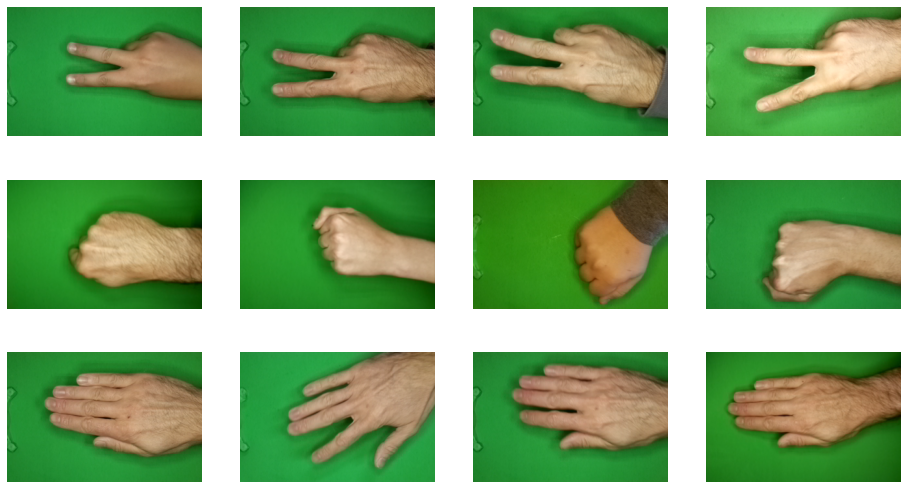

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt                                                   #Mengimpor modul matplotlib
import matplotlib.image as mpimg

nrows = 3                                                                         #Jumlah baris tampilan gambar
ncols = 4                                                                         #Jumlah baris tampilan gambar

pic_index = 0                                                                     #Index awal untuk iterasi gambar

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 3)                                         #Mengatur gambar output matplotlib, dan ukurannya agar menjadi 4*6 gambar

pic_index += 4                                                                    #Index tambah bertambah 4 setiap baris
gbr_tampil_gunting  = [os.path.join(fold_gunting, fname)                          #Menampilkan gambar gunting
                      for fname in file_gunting[pic_index-4:pic_index]]
gbr_tampil_batu     = [os.path.join(fold_batu, fname)                             #Menampilkan gambar batu
                      for fname in file_batu[pic_index-4:pic_index]]
gbr_tampil_kertas   = [os.path.join(fold_kertas, fname)                           #Menampilkan gambar kertas
                      for fname in file_kertas[pic_index-4:pic_index]]

for i, img_path in enumerate(gbr_tampil_gunting+gbr_tampil_batu+gbr_tampil_kertas):
  sp = plt.subplot(nrows, ncols, i + 1)                                           #Mengatur subplot; indeks subplot dimulai dari 1
  sp.axis('Off')                                                                  #Tidak menampilkan Gridlines

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

# Menggunakan Image Generator

Mengimpor modul yang digunakan

In [ ]:
import tensorflow as tf                                                           #Mengimpor modul tensorflow 
import keras_preprocessing                                                        #Mengimpor modul keras 
from keras_preprocessing import image                                             #Mengimpor keras_preprocessing untuk gambar  
from keras_preprocessing.image import ImageDataGenerator                          #Mengimpor Image Generator

# Melakukan Augmentasi & Pemisahan Data menjadi Training dan Validation

Data dikelompokkan menjadi Data Training dan Data Validasi, masing masing folder tersebut masih juga terbagi ke dalam folder Gunting, Batu, dan Kertas untuk melakukan pelabelan menggunakan Image Generator, skema nya adalah sebagai berikut:

![alt text](https://drive.google.com/uc?id=1_OMG9a94AF4P3I9hi-pNj314bZtwHMYD)

In [ ]:
BASIS_DIR = "/content/rockpaperscissors/rps-cv-images/"                           #Menyiapkan folder utama
training_datagen = ImageDataGenerator(                                            #Image generator
      rescale = 1./255,                                                           #Menormalisasi data
#>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>AUGMENTASI<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
	    rotation_range=40,                                                          #Menerapkan skenario rotasi gambar hingga 40 derajat          
      width_shift_range=0.2,                                                      #Menerapkan skenario pelebaran gambar hingga hingga sebanyak 0.2 dari ukuran asli
      height_shift_range=0.2,                                                     #Menerapkan skenario peninggian gambar hingga hingg sebanyak 0.2 dari ukuran asli
      shear_range=0.2,                                                            #Menerapkan skenario pemangkasan gambar gambar hingga sebanyak 0.2 dari ukuran asli 
      zoom_range=0.2,                                                             #Menerapkan skenario zoom gambar hingga sebesar 0.2 
      horizontal_flip=True,                                                       #Menerapkan skenario putar balik gambar secara horizontal 
      fill_mode='nearest',                                                        #Mengisi piksel yang kosong dengan nilai piksel terdekat 
#>>>>>>>>>>>MEMECAH DATA MENJADI DATA TRAINING DAN DATA VALIDASI<<<<<<<<<<<<<<<<      
      validation_split=0.2                                                        #80% Data Training, 20% Data Validasi
      )

Pelabelan data menggunakan Image Data Generator berdasarkan Folder

In [ ]:
train_generator = training_datagen.flow_from_directory(                           #Generator data training
	BASIS_DIR,                                                                      #Folder target untuk digenerasi
	target_size=(150,150),                                                          #Mengubah resolusi seluruh gambar menjadi 150x150 piksel
	class_mode='categorical',                                                       #Kelas data kategori untuk klasifikasi multivariabel
  shuffle=True,                                                                   
  subset='training'                                                               #Untuk data training
  )

validation_generator = training_datagen.flow_from_directory(                      #Generator data validasi
	BASIS_DIR,                                                                      #Folder target untuk digenerasi
	target_size=(150,150),                                                          #Mengubah resolusi seluruh gambar menjadi 150x150 piksel
	class_mode='categorical',                                                       #Kelas data kategori untuk klasifikasi multivariabel
  shuffle=True,
  subset='validation'                                                             #Untuk data validasi
  )

Found 1751 images belonging to 3 classes.
Found 437 images belonging to 3 classes.


# Membangun Model Jaringan Saraf Tiruan

Model yang digunakan adalah model **Sequential**

In [ ]:
model = tf.keras.models.Sequential([                                              #Membentuk model sequential
                                                                                  #Bentuk input adalah gambar dengan ukuran 150x150 dengan 3 byte warna
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)), #Layer Konvolusi pertama
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),                         #Layer Konvolusi kedua
    tf.keras.layers.MaxPooling2D(2,2), 
    
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),                         #Layer Konvolusi ketiga
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),                                                    #Layer input untuk Deep Learning Neural Network
    tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Dense(128, activation='relu'),                                #Hiden layer pertama dengan 512 neuron
    
    tf.keras.layers.Dense(512, activation='relu'),                                #Hiden layer kedua dengan 512 neuron
    
    tf.keras.layers.Dense(3, activation='softmax')                                #Layer output
])

model.summary()                                                                   #Menampilkan summary model

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9248)              0

Melakukan Kompilasi Model

In [ ]:
model.compile(loss = 'categorical_crossentropy',                                  #Loss function Yang digunakan untuk Klasifikasi Kategori Lebih Dari 2
              optimizer='rmsprop',                                                #Fungsi optimizer(Yang Pernah diajarkan adalah 'adam')
              metrics=['accuracy'])                                               #Menampilkan akurasi model training

# Melatih Model Jaringan Saraf Tiruan

In [ ]:
history=model.fit(
    train_generator,                                                              #Data training hasil generasi
    steps_per_epoch=4,                                                            #Jumlah batch yang akan dieksekusi pada setiap epoch
    epochs=25,                                                                    #Jumlah perulangan komputasi(epoch)
    validation_data=validation_generator,                                         #Menampilkan akurasi pengujian data validasi
    validation_steps=4,                                                           #Jumlah batch yang akan dieksekusi pada setiap epoch
    verbose=2
    )

Epoch 1/25
4/4 - 6s - loss: 1.0939 - accuracy: 0.3445 - val_loss: 1.0894 - val_accuracy: 0.3984
Epoch 2/25
4/4 - 2s - loss: 1.1004 - accuracy: 0.4141 - val_loss: 1.0886 - val_accuracy: 0.3438
Epoch 3/25
4/4 - 2s - loss: 1.0936 - accuracy: 0.4375 - val_loss: 1.0763 - val_accuracy: 0.5156
Epoch 4/25
4/4 - 2s - loss: 1.0593 - accuracy: 0.4141 - val_loss: 1.2091 - val_accuracy: 0.3594
Epoch 5/25
4/4 - 2s - loss: 1.1473 - accuracy: 0.3359 - val_loss: 1.0766 - val_accuracy: 0.5078
Epoch 6/25
4/4 - 2s - loss: 1.0258 - accuracy: 0.4790 - val_loss: 0.9649 - val_accuracy: 0.5312
Epoch 7/25
4/4 - 2s - loss: 1.0655 - accuracy: 0.4297 - val_loss: 1.0394 - val_accuracy: 0.5000
Epoch 8/25
4/4 - 2s - loss: 1.0321 - accuracy: 0.4766 - val_loss: 1.0728 - val_accuracy: 0.3906
Epoch 9/25
4/4 - 2s - loss: 1.0473 - accuracy: 0.4141 - val_loss: 1.0677 - val_accuracy: 0.3594
Epoch 10/25
4/4 - 2s - loss: 1.0757 - accuracy: 0.4297 - val_loss: 1.0300 - val_accuracy: 0.5781
Epoch 11/25
4/4 - 2s - loss: 1.0074 - a

# Ploting Akurasi Training dan Validasi

Melihat pergerakan besaran nilai akurasi Training dan Validasi

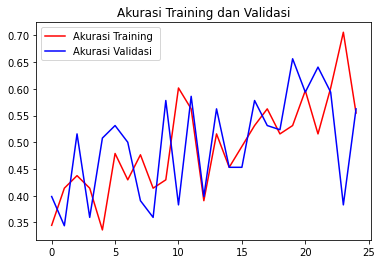

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt                                                   #Mengimpor modul matplotlib
acc = history.history['accuracy']                                                 #Nilai akurasi training
val_acc = history.history['val_accuracy']                                         #Nilai akurasi validasi
loss = history.history['loss']                                                    #Nilai loss training
val_loss = history.history['val_loss']                                            #Nilai loss validasi

epochs = range(len(acc))                                                          #Jumlah epoch

plt.plot(epochs, acc, 'r', label='Akurasi Training ')                             #Plot nilai akurasi training                     
plt.plot(epochs, val_acc, 'b', label='Akurasi Validasi')                          #Plot nilai akurasi validasi
plt.title('Akurasi Training dan Validasi')                                        #Menamai gambar
plt.legend(loc=0)                                                                 #Menampilkan legenda
plt.figure()                                                                      
plt.show()

# Uji Coba Model Klasifikasi Gambar Tangan Gunting, Batu, Kertas

Melakukan simulasi klasifikasi, mengunggah gambar dan model menentukan apakah gambar tersebut merupakan gambar tangan yang membentuk Gunting, Batu, atau Kertas

In [ ]:
import numpy as np                                                                #Mengimpor modul numpy
from google.colab import files                                                    #Mengimpor modul import file
from keras.preprocessing import image                                             #Mengimpor modul keras_preprocessing untuk gambar

uploaded = files.upload()                                                         #Mengunggah gambar yang akan dikenali model

for fn in uploaded.keys():

  path = fn
  img = image.load_img(path, target_size=(150, 150))                              #Mengubah ukuran gambar menjadi 150x150 piksel
  imgplot = plt.imshow(img)                                                       #Menampilkan gambar yang diunggah
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  if classes[0][0]==1:
    print('Tangan Ini Menunjukkan bentuk KERTAS')                                 #Jika gambar tangan membentuk Kertas, tampilkan tulisan "Kertas"
  elif classes[0][1]==1:
    print('Tangan Ini Menunjukkan bentuk BATU')                                   #Jika gambar tangan membentuk Batu, tampilkan tulisan "Batu"
  elif classes[0][2]==1:
    print('Tangan Ini Menunjukkan bentuk GUNTING')                                #Jika gambar tangan membentuk Gunting, tampilkan tulisan "Gunting"
  else:
    print('Tidak Diketahui')                                                      #Jika gambar yang diunggah selain gambar tangan yang diinginkan, tampilkan "Tidak Diketahui"

TypeError: ignored

# Program Klasifikasi Gambar dengan Kriteria Henti(Callback)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 34, 34, 32)        9248      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 17, 17, 32)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 9248)             

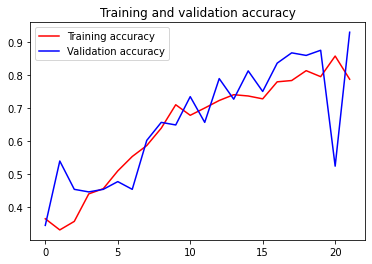

<Figure size 432x288 with 0 Axes>

In [ ]:
#>>>>>>>>>>>>>>>>>>>>>>>>>KRITERIA HENTI TRAINING MODEL<<<<<<<<<<<<<<<<<<<<<<<<<
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_accuracy')>0.9):
      print("\nPELATIHAN BERHENTI, AKURASI MODEL SUDAH LEBIH DARI 90%!")
      self.model.stop_training = True

callbacks = myCallback()

#>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>MEMBANGUN MODEL<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)), 
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),                         
    tf.keras.layers.MaxPooling2D(2,2), 
    
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),                         
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),                                                    
    tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Dense(128, activation='relu'),                                
    
    tf.keras.layers.Dense(512, activation='relu'),                                
    
    tf.keras.layers.Dense(3, activation='softmax')                                
])

model.summary()

#>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>MENGKOMPILASI MODEL<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

#>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>MELATIH MODEL<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
history=model.fit(
    train_generator,
    steps_per_epoch=16,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=4, 
    verbose=2,
    callbacks=[callbacks]
    )

#>>>>>>>>>>>>>>>>>>>>>>>>PLOT AKURASI TRAINING & VALIDASI<<<<<<<<<<<<<<<<<<<<<<<
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

# Referensi

1. Rock Paper Scissors Classification Excercise by L Moroney Courseera, link: https://colab.research.google.com/github/lmoroney/dlaicourse/blob/master/Course%202%20-%20Part%208%20-%20Lesson%202%20-%20Notebook%20(RockPaperScissors).ipynb#scrollTo=LWTisYLQM1aM

2. Live Coding Image Classification with Rock-Paper-Scissors using CNN by Hakikid Amana,  link: https://www.youtube.com/watch?v=cdaZIHeRJP0&t=124s


# Kriteria Wajib & Tambahan

Berikut adalah kriteria wajib yang coba saya penuhi dan beberapa aspek sebagai kriteria tambahan

![alt text](https://drive.google.com/uc?id=1sjZYqDZ5Qrj-RDhLcc7BLwFEFAH_ZWTy)

# Ucapan Terima Kasih
Terimakasih saya ucapkan kepada Dicoding Academy yang telah turut andil dalam program beasiswa ini, semoga dicoding semakin berkembang menjadi lembaga pelatihan IT yang terbaik. 

Wassalamualaikum warahmatullahi wabarakatuh